In [2]:
from qiskit.providers.ibmq.runtime import UserMessenger
from qiskit import Aer, IBMQ
import numpy as np
from runtime_test import main
import matplotlib.pyplot as plt

In [3]:
provider = IBMQ.load_account()
provider = IBMQ.get_provider(group='deployed')

In [4]:
def interim_result_callback(job_id, interim_result):
    print(interim_result)

10
[10, 0.3999999999999999]
[20, -0.19999999999999996]
[30, 2.8e-17]
[40, -0.19999999999999993]
[50, 0.19999999999999993]
[60, -0.20000000000000004]
[70, -0.3999999999999999]
[80, -2.8e-17]
[90, 0.4]
[100, 0.4]
[10, 0.2000000000000001]
[20, 0.40000000000000013]
[30, 0.40000000000000013]
[40, 0.40000000000000013]
[50, -0.6000000000000001]
[60, -0.6]
[70, -0.6]
[80, -0.8000000000000002]
[90, -0.6000000000000001]
[100, -0.9999999999999999]
100
[10, 0.08000000000000002]
[20, -0.12000000000000001]
[30, 0.03999999999999999]
[40, 0.04000000000000005]
[50, 0.06000000000000008]
[60, -0.16]
[70, 0.07999999999999999]
[80, 0.040000000000000056]
[90, -6.2e-17]
[100, -0.29999999999999993]
[10, 0.7599999999999999]
[20, 0.5399999999999999]
[30, 0.36000000000000004]
[40, -0.11999999999999998]
[50, -0.48]
[60, -0.7]
[70, -0.8600000000000001]
[80, -0.74]
[90, -0.68]
[100, -0.82]
1000
[10, 0.036000000000000046]
[20, -0.0400000000000001]
[30, -0.009999999999999964]
[40, 0.064]
[50, 0.04400000000000002]
[60

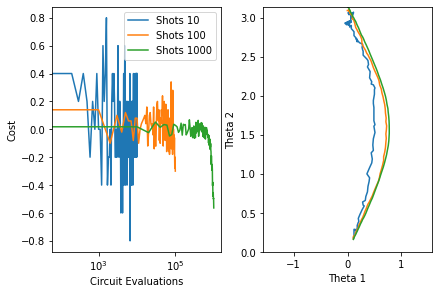

In [9]:
import uuid

meta = {
  "name": #"grad_paper-{}".format(uuid.uuid4()),
    "grad_paper-lima",
  "description": "A sample gradient program.",
  "max_execution_time": 10000,
}

meta["parameters"] = [
    {"name": "shots", "description": "Number of shots", "type": "int", "required": True},
    {"name": "init_point", "description": "Initial parameters", "type": "ndarray", "required": True},
  ]

meta['return_values'] = [
    {"name": "result", "description": "Final result in list.", "type": "list"}
  ]

meta["interim_results"] = [
    {"name": "vals", "description": "Iteration, value at current optimization step", "type": "list"},
  ]

#backend = provider.backend.ibmq_qasm_simulator
backend = provider.backend.ibmq_lima
#backend = provider.backend.ibmq_manila
options = {'backend_name': backend.name()}
program_id = provider.runtime.upload_program(data='runtime_test.py', metadata=meta)

initial_point = np.random.uniform(0, 2 * np.pi, 5)

inputs = {}
inputs['init_point'] = initial_point

shots = [10, 100, 1000]
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout()
for s in shots:
    print(s)
    inputs['shots'] = s
    job = provider.runtime.run(program_id, options=options, inputs=inputs, callback=interim_result_callback)
    gd_loss, x_values = job.result()
    cir_evals = np.array([i for i in range(len(gd_loss))])
    cir_evals *= (2 * len(initial_point) * s)
    ax1.plot(cir_evals, gd_loss, label='Shots %d'%s)
    ax2.plot(x_values[:,0], x_values[:,1], label='Shots %d'%s)

# Make the graph look nice
#ax1.axhline(-1, ls='--', c='tab:red', label='Target')
ax1.set_ylabel('Cost')
ax1.set_xlabel('Circuit Evaluations')
ax1.set_xscale('log')
ax1.legend()
ax2.set_ylim(0, np.pi)
ax2.set_xlim(-np.pi/2, np.pi/2)
ax2.set_ylabel('Theta 2')
ax2.set_xlabel('Theta 1')
#ax2.legend()
plt.show()